simple 
simple_12_200_iters_400_n 
- 9158ac3c46364957a436fb8fdec888af
-  thiss one only as the 400 sample size
-  

run1_100_1
3503c85c6c09414c9daecad84fd466de

- get the experiment and run artifacts


In [2]:
import mlflow as ml
import numpy as np
ml.set_tracking_uri("../mlruns")
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
def get_all_artf(run_id, name = None, keyword = None):
	if name is None:
		name = keyword
	runinfo  = ml.get_run(run_id)
	print(runinfo)
	art_uri = runinfo.info.artifact_uri
	art_lst = ml.artifacts.list_artifacts(run_id=run_id)
	art_nms = [i.path for i in art_lst]
	out_dct = {}
	for n in art_nms:
		if ".json" in n:
		# print(n)
			if name is None:
				# print(n)
				val = ml.artifacts.load_dict(artifact_uri=art_uri+ "/"+n)
				out_dct[n] = val
			else:
				if name in n:
					val = ml.artifacts.load_dict(artifact_uri=art_uri+ "/"+n)
					out_dct[n] = val
	return out_dct

# Simple 1_2

In [4]:
# run1 = ml.get_run("9158ac3c46364957a436fb8fdec888af")
artf1 = get_all_artf("3503c85c6c09414c9daecad84fd466de")
artf1 = pd.DataFrame(artf1).T

<Run: data=<RunData: metrics={}, params={}, tags={'mlflow.runName': 'run1_100_1',
 'mlflow.source.git.commit': 'ce9c10cc3382186470ac362f0ececea7717a864a',
 'mlflow.source.name': 'simple_12.py',
 'mlflow.source.type': 'LOCAL',
 'mlflow.user': 'jacobtiegs'}>, info=<RunInfo: artifact_uri='/Users/jacobtiegs/projects/bart_paper/bart_survival_paper/py/../mlruns/456088235245605733/3503c85c6c09414c9daecad84fd466de/artifacts', end_time=1710134945837, experiment_id='456088235245605733', lifecycle_stage='active', run_id='3503c85c6c09414c9daecad84fd466de', run_name='run1_100_1', run_uuid='3503c85c6c09414c9daecad84fd466de', start_time=1710098105082, status='FINISHED', user_id='jacobtiegs'>, inputs=<RunInputs: dataset_inputs=[]>>


In [4]:
artf1

,cens_retrieved,rmse,bias,cov,ivl,trees,split_rules,N,seeds,type,x_vars,VAR_CLASS,VAR_PROB,scale_f,shape_f,cens_scale,iters,seed_addl,time
1_1_200_cens.json,0.202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1_1_200_met_k.json,NaN,"[0.018821506487716303, 0.032882817116890374, 0...","[-0.00034872118826489887, -0.00661235555378879...","[0.92, 0.96, 0.96, 0.98, 0.98]","[0.07495498074680594, 0.1298533441759659, 0.14...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1_1_200_met_p.json,NaN,"[0.018637520810679646, 0.03196784092851695, 0....","[0.0038326254577181894, -0.008623012012956219,...","[0.94, 0.98, 0.98, 0.98, 1.0]","[0.0820901886819745, 0.14416291087430552, 0.16...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1_1_200_met_r.json,NaN,"[0.018598446271212588, 0.03219331104044318, 0....","[0.0018331929818727554, -0.005896203148710795,...","[0.92, 0.97, 0.96, 0.98, 0.98]","[0.07187757349633578, 0.12759429023536628, 0.1...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1_1_200_model_dict.json,NaN,NaN,NaN,NaN,NaN,15,[pmb.ContinuousSplitRule()],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
time_2_400.json,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4446.304575
time_3_200.json,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4626.967295
time_3_400.json,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5903.719159
time_4_200.json,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4541.484287


In [ ]:
artf1.to_excel("../artf1.xlsx")

In [5]:
artf1_2 = artf1[~artf1["rmse"].isna()]
rmse = artf1_2["rmse"]
bias = artf1_2["bias"]
cov = artf1_2["cov"]
# covkr = artf1_2["cov"][~artf1_2["cov"].isna()]
# covp = artf1_2["cov_ci"][~artf1_2["cov_ci"].isna()]
# cov = pd.concat([covkr, covp])

In [6]:
# coverage set 1
set1 = cov[cov.index.str.contains("^1_")]
set1k = set1[set1.index.str.contains("k")]
set1r = set1[set1.index.str.contains("r")]
set1p = set1[set1.index.str.contains("p")]
cov_k = np.array([np.array(x) for x in set1k.values]).flatten()
cov_r = np.array([np.array(x) for x in set1r.values]).flatten()
cov_p = np.array([np.array(x) for x in set1p.values]).flatten()

# rmse
set1 = rmse[rmse.index.str.contains("^1_")]
set1k = set1[set1.index.str.contains("k")]
set1r = set1[set1.index.str.contains("r")]
set1p = set1[set1.index.str.contains("p")]
rmse_k = np.array([np.array(x) for x in set1k.values]).flatten()
rmse_r = np.array([np.array(x) for x in set1r.values]).flatten()
rmse_p = np.array([np.array(x) for x in set1p.values]).flatten()

#bias
set1 = bias[bias.index.str.contains("^1_")]
set1k = set1[set1.index.str.contains("k")]
set1r = set1[set1.index.str.contains("r")]
set1p = set1[set1.index.str.contains("p")]
bias_k = np.array([np.array(x) for x in set1k.values]).flatten()
bias_r = np.array([np.array(x) for x in set1r.values]).flatten()
bias_p = np.array([np.array(x) for x in set1p.values]).flatten()

In [7]:
def sctr_plt(center, size, scale=.02):
	sctr = np.random.normal(center, scale, size)
	return sctr


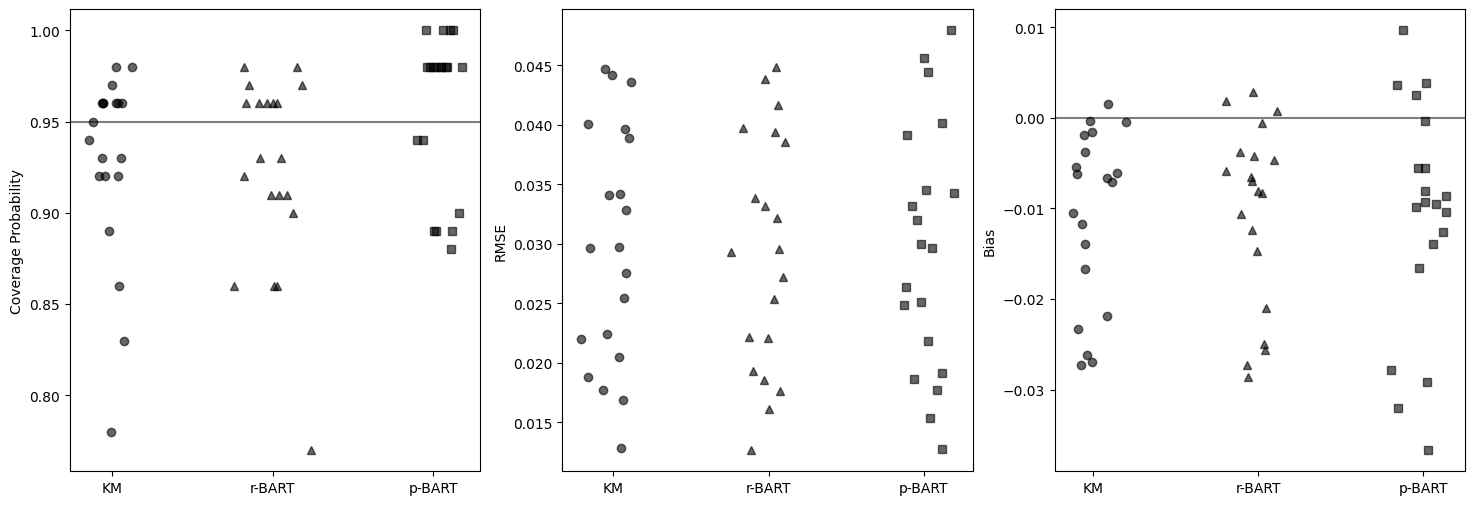

In [8]:
# set up plot
fig, ax = plt.subplots(nrows=1, ncols=3)
fig.set_figwidth(18)
fig.set_figheight(6)

# coverage
x_val = [1, 1.2, 1.4]
cov_k_x = sctr_plt(x_val[0], cov_k.shape[0]) # scatter
cov_r_x = sctr_plt(x_val[1], cov_r.shape[0])
cov_p_x = sctr_plt(x_val[2], cov_p.shape[0])

ax[0].plot(cov_k_x, cov_k, "o", color = "black", alpha=0.6)
ax[0].plot(cov_r_x, cov_r, "^", color = "black", alpha=0.6)
ax[0].plot(cov_p_x, cov_p, "s", color = "black", alpha=0.6)
ax[0].set_xticks(x_val, ["KM", "r-BART", "p-BART"])
ax[0].set_ylabel("Coverage Probability")
ax[0].axhline(y=0.95, color = "black", alpha = 0.5)

# rmse
# x_val = [1, 1.5, 2]
rmse_k_x = sctr_plt(x_val[0], rmse_k.shape[0]) # scatter
rmse_r_x = sctr_plt(x_val[1], rmse_r.shape[0])
rmse_p_x = sctr_plt(x_val[2], rmse_p.shape[0])

ax[1].plot(rmse_k_x, rmse_k, "o", color = "black", alpha=0.6)
ax[1].plot(rmse_r_x, rmse_r, "^", color = "black", alpha=0.6)
ax[1].plot(rmse_p_x, rmse_p, "s", color = "black", alpha=0.6)
ax[1].set_xticks(x_val, ["KM", "r-BART", "p-BART"])
ax[1].set_ylabel("RMSE")
# ax[1].set_yticks()


# rmse
# x_val = [1, 1.5, 2]
bias_k_x = sctr_plt(x_val[0], bias_k.shape[0]) # scatter
bias_r_x = sctr_plt(x_val[1], bias_r.shape[0])
bias_p_x = sctr_plt(x_val[2], bias_p.shape[0])

ax[2].plot(bias_k_x, bias_k, "o", color = "black", alpha=0.6)
ax[2].plot(bias_r_x, bias_r, "^", color = "black", alpha=0.6)
ax[2].plot(bias_p_x, bias_p, "s", color = "black", alpha=0.6)
ax[2].set_xticks(x_val, ["KM", "r-BART", "p-BART"])
ax[2].set_ylabel("Bias")
# ax[2].set_yticks()
ax[2].axhline(y=0, color = "black", alpha = 0.5)

In [9]:
# fig 2
# coverage set 1
set1 = cov[cov.index.str.contains("^2_")]
set1k = set1[set1.index.str.contains("k")]
set1r = set1[set1.index.str.contains("r")]
set1p = set1[set1.index.str.contains("p")]
cov_k = np.array([np.array(x) for x in set1k.values]).flatten()
cov_r = np.array([np.array(x) for x in set1r.values]).flatten()
cov_p = np.array([np.array(x) for x in set1p.values]).flatten()

# rmse
set1 = rmse[rmse.index.str.contains("^2_")]
set1k = set1[set1.index.str.contains("k")]
set1r = set1[set1.index.str.contains("r")]
set1p = set1[set1.index.str.contains("p")]
rmse_k = np.array([np.array(x) for x in set1k.values]).flatten()
rmse_r = np.array([np.array(x) for x in set1r.values]).flatten()
rmse_p = np.array([np.array(x) for x in set1p.values]).flatten()

#bias
set1 = bias[bias.index.str.contains("^2_")]
set1k = set1[set1.index.str.contains("k")]
set1r = set1[set1.index.str.contains("r")]
set1p = set1[set1.index.str.contains("p")]
bias_k = np.array([np.array(x) for x in set1k.values]).flatten()
bias_r = np.array([np.array(x) for x in set1r.values]).flatten()
bias_p = np.array([np.array(x) for x in set1p.values]).flatten()

In [10]:
bias_k

array([-0.00227187, -0.00635572, -0.00463288, -0.00897735, -0.00590011,
       -0.0041358 , -0.0063606 , -0.0076491 , -0.01056321, -0.00961062,
       -0.00925255, -0.02095744, -0.02742565, -0.04764444, -0.04021731,
       -0.01162976, -0.02402774, -0.03390061, -0.05484375, -0.04207815])

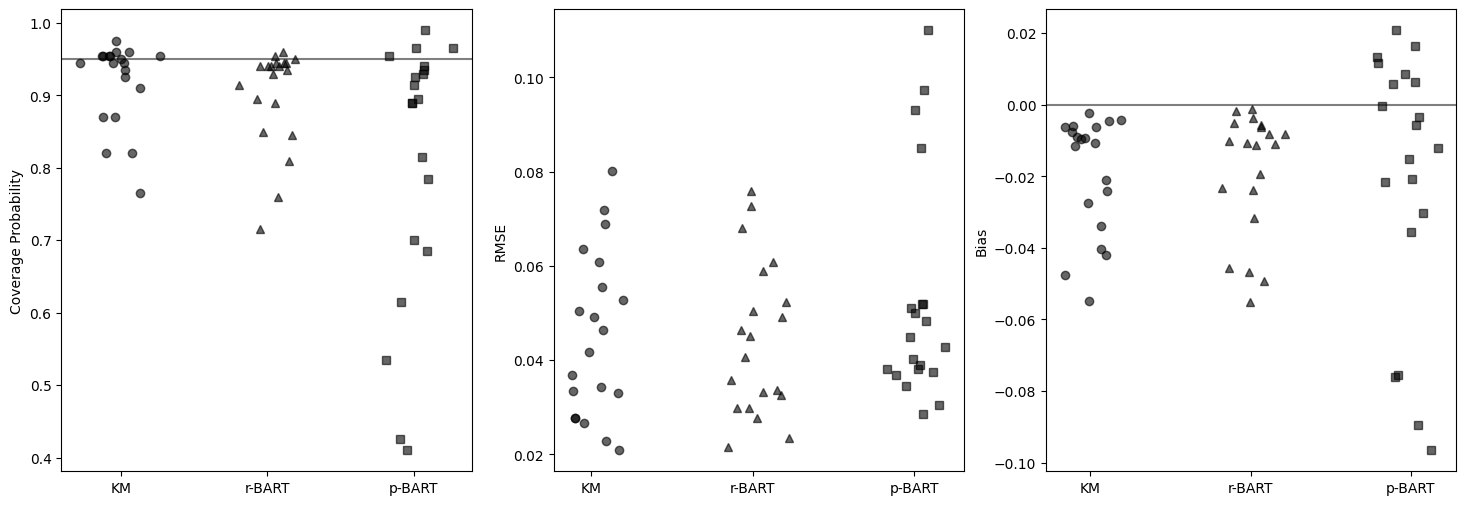

In [129]:
# set up plot
fig, ax = plt.subplots(nrows=1, ncols=3)
fig.set_figwidth(18)
fig.set_figheight(6)

# coverage
x_val = [1, 1.2, 1.4]
cov_k_x = sctr_plt(x_val[0], cov_k.shape[0]) # scatter
cov_r_x = sctr_plt(x_val[1], cov_r.shape[0])
cov_p_x = sctr_plt(x_val[2], cov_p.shape[0])

ax[0].plot(cov_k_x, cov_k, "o", color = "black", alpha=0.6)
ax[0].plot(cov_r_x, cov_r, "^", color = "black", alpha=0.6)
ax[0].plot(cov_p_x, cov_p, "s", color = "black", alpha=0.6)
ax[0].set_xticks(x_val, ["KM", "r-BART", "p-BART"])
ax[0].set_ylabel("Coverage Probability")
ax[0].axhline(y=0.95, color = "black", alpha = 0.5)

# rmse
# x_val = [1, 1.5, 2]
rmse_k_x = sctr_plt(x_val[0], rmse_k.shape[0]) # scatter
rmse_r_x = sctr_plt(x_val[1], rmse_r.shape[0])
rmse_p_x = sctr_plt(x_val[2], rmse_p.shape[0])

ax[1].plot(rmse_k_x, rmse_k, "o", color = "black", alpha=0.6)
ax[1].plot(rmse_r_x, rmse_r, "^", color = "black", alpha=0.6)
ax[1].plot(rmse_p_x, rmse_p, "s", color = "black", alpha=0.6)
ax[1].set_xticks(x_val, ["KM", "r-BART", "p-BART"])
ax[1].set_ylabel("RMSE")
# ax[1].set_yticks()


# rmse
# x_val = [1, 1.5, 2]
bias_k_x = sctr_plt(x_val[0], bias_k.shape[0]) # scatter
bias_r_x = sctr_plt(x_val[1], bias_r.shape[0])
bias_p_x = sctr_plt(x_val[2], bias_p.shape[0])

ax[2].plot(bias_k_x, bias_k, "o", color = "black", alpha=0.6)
ax[2].plot(bias_r_x, bias_r, "^", color = "black", alpha=0.6)
ax[2].plot(bias_p_x, bias_p, "s", color = "black", alpha=0.6)
ax[2].set_xticks(x_val, ["KM", "r-BART", "p-BART"])
ax[2].set_ylabel("Bias")
# ax[2].set_yticks()
ax[2].axhline(y=0, color = "black", alpha = 0.5)

In [7]:
# simple 2 


artf2 = get_all_artf("b3b5016356324efa8bcbe0c3e00462a5")
artf2 = pd.DataFrame(artf2).T

<Run: data=<RunData: metrics={}, params={}, tags={'mlflow.runName': 'run_t2_200_1',
 'mlflow.source.git.commit': 'ce9c10cc3382186470ac362f0ececea7717a864a',
 'mlflow.source.name': 'simple_12.py',
 'mlflow.source.type': 'LOCAL',
 'mlflow.user': 'jacobtiegs'}>, info=<RunInfo: artifact_uri='/Users/jacobtiegs/projects/bart_paper/bart_survival_paper/py/../mlruns/456088235245605733/b3b5016356324efa8bcbe0c3e00462a5/artifacts', end_time=1710328659150, experiment_id='456088235245605733', lifecycle_stage='active', run_id='b3b5016356324efa8bcbe0c3e00462a5', run_name='run_t2_200_1', run_uuid='b3b5016356324efa8bcbe0c3e00462a5', start_time=1710211211054, status='FINISHED', user_id='jacobtiegs'>, inputs=<RunInputs: dataset_inputs=[]>>


In [1]:
# artf2

In [9]:
artf2.to_excel("../artf2_simple21-22.xlsx")

In [41]:
artf1_2 = artf1[~artf1["rmse"].isna()]
rmse = artf1_2["rmse"]
bias = artf1_2["bias"]
cov = artf1_2["cov"]

# artf is artifact
# met_term = ["rmse", "bias", "cov"]
# seet_term
def get_mets(artf, set_term, alg_term = ["k", "r", "p"], met_term = "rmse"):
	# get the rows where metrics are not NA
	rbc_true = artf[~artf["rmse"].isna()]
	# ['cov', 'rmse', 'bias]
	met = rbc_true[met_term]
	# collect the set values that want to be grouped together (useful in runs where 1_1 and 2_1 exist)
	# set_term should be like 2_1
	set1 = met[met.index.str.contains(f"^{set_term}")]
	# alg (algorithm) = ["k", "r", "p"]
	def get_submet(set1, alg):
		set1val= set1[set1.index.str.contains(alg)]
		met = np.array([np.array(x) for x in set1val.values]).flatten()
		return met
	
	met_k = get_submet(set1, alg_term[0])
	met_r = get_submet(set1, alg_term[1])
	met_p = get_submet(set1, alg_term[2])
	return {alg_term[0]:met_k, alg_term[1]:met_r, alg_term[2]:met_p}

In [26]:
rmse2 = get_mets(artf=artf2, set_term="2_", met_term="rmse")
bias2 = get_mets(artf=artf2, set_term="2_", met_term="bias")
cov2 = get_mets(artf=artf2, set_term="2_", met_term="cov")

In [20]:
def sctr_plt(center, size, scale=.02):
	sctr = np.random.normal(center, scale, size)
	return sctr


In [28]:
def get_rbc_plots(cov, rmse, bias):
	cov_k, cov_r, cov_p = cov["k"], cov["r"], cov["p"]
	rmse_k, rmse_r, rmse_p = rmse["k"], rmse["r"], rmse["p"]
	bias_k, bias_r, bias_p = bias["k"], bias["r"], bias["p"]
	
	# set up plot
	fig, ax = plt.subplots(nrows=1, ncols=3)
	fig.set_figwidth(18)
	fig.set_figheight(6)

	# coverage
	x_val = [1, 1.2, 1.4]
	cov_k_x = sctr_plt(x_val[0], cov_k.shape[0]) # scatter
	cov_r_x = sctr_plt(x_val[1], cov_r.shape[0])
	cov_p_x = sctr_plt(x_val[2], cov_p.shape[0])

	ax[0].plot(cov_k_x, cov_k, "o", color = "black", alpha=0.6)
	ax[0].plot(cov_r_x, cov_r, "^", color = "black", alpha=0.6)
	ax[0].plot(cov_p_x, cov_p, "s", color = "black", alpha=0.6)
	ax[0].set_xticks(x_val, ["KM", "r-BART", "p-BART"])
	ax[0].set_ylabel("Coverage Probability")
	ax[0].axhline(y=0.95, color = "black", alpha = 0.5)

	# rmse
	# x_val = [1, 1.5, 2]
	rmse_k_x = sctr_plt(x_val[0], rmse_k.shape[0]) # scatter
	rmse_r_x = sctr_plt(x_val[1], rmse_r.shape[0])
	rmse_p_x = sctr_plt(x_val[2], rmse_p.shape[0])

	ax[1].plot(rmse_k_x, rmse_k, "o", color = "black", alpha=0.6)
	ax[1].plot(rmse_r_x, rmse_r, "^", color = "black", alpha=0.6)
	ax[1].plot(rmse_p_x, rmse_p, "s", color = "black", alpha=0.6)
	ax[1].set_xticks(x_val, ["KM", "r-BART", "p-BART"])
	ax[1].set_ylabel("RMSE")
	# ax[1].set_yticks()

	# rmse
	# x_val = [1, 1.5, 2]
	bias_k_x = sctr_plt(x_val[0], bias_k.shape[0]) # scatter
	bias_r_x = sctr_plt(x_val[1], bias_r.shape[0])
	bias_p_x = sctr_plt(x_val[2], bias_p.shape[0])

	ax[2].plot(bias_k_x, bias_k, "o", color = "black", alpha=0.6)
	ax[2].plot(bias_r_x, bias_r, "^", color = "black", alpha=0.6)
	ax[2].plot(bias_p_x, bias_p, "s", color = "black", alpha=0.6)
	ax[2].set_xticks(x_val, ["KM", "r-BART", "p-BART"])
	ax[2].set_ylabel("Bias")
	# ax[2].set_yticks()
	ax[2].axhline(y=0, color = "black", alpha = 0.5)

	return fig

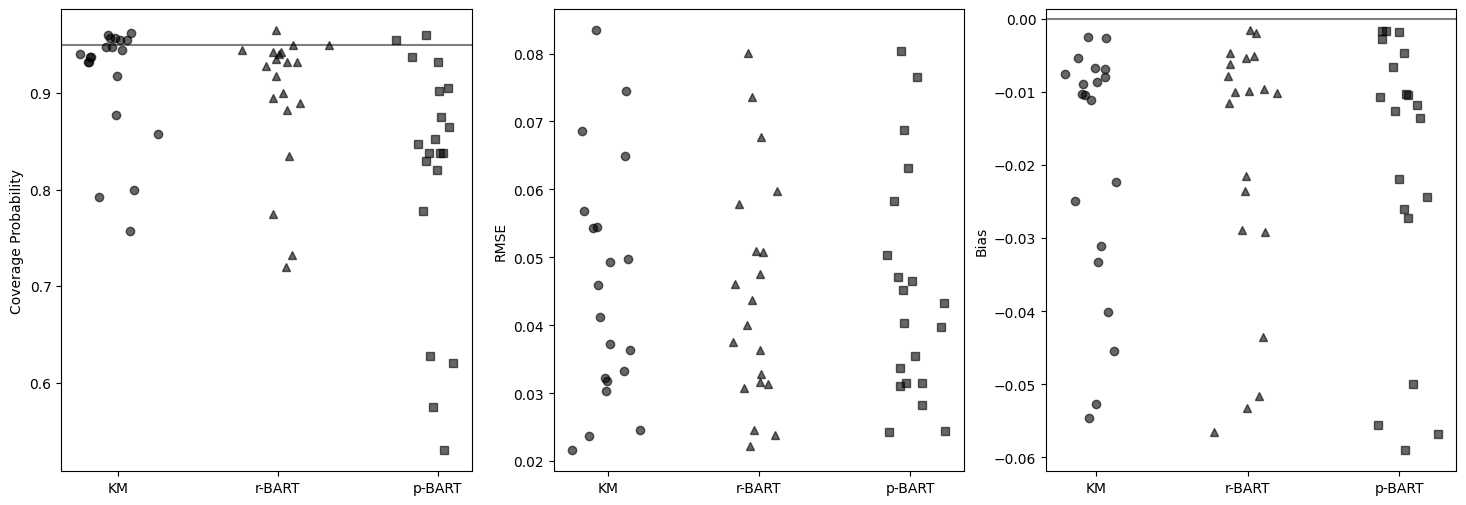

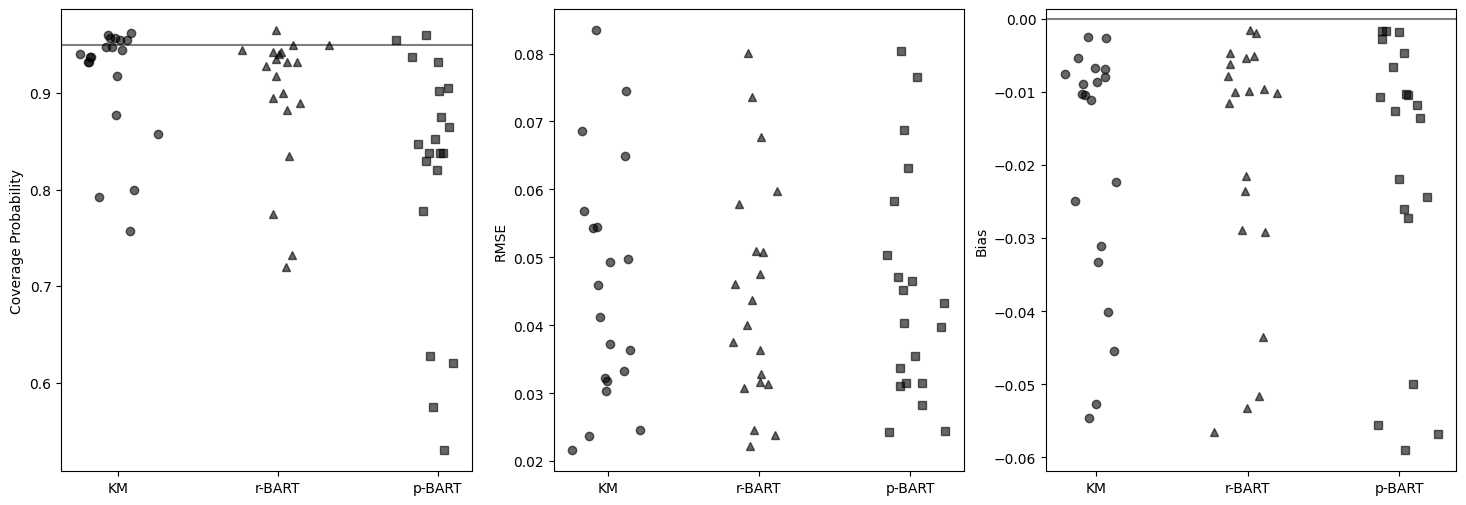

In [29]:
get_rbc_plots(cov = cov2, rmse=rmse2, bias=bias2)

# Regression Prop

In [30]:

artf3 = get_all_artf("7cc54298176a408ba773155bd62f8cb8")
artf3 = pd.DataFrame(artf3).T

<Run: data=<RunData: metrics={}, params={}, tags={'mlflow.runName': 'cmplx_1_400_200',
 'mlflow.source.git.commit': '057b8a3a516771878157f50b87d9727014dac44c',
 'mlflow.source.name': 'complex_123.py',
 'mlflow.source.type': 'LOCAL',
 'mlflow.user': 'jacobtiegs'}>, info=<RunInfo: artifact_uri='/Users/jacobtiegs/projects/bart_paper/bart_survival_paper/py/../mlruns/242260670390112595/7cc54298176a408ba773155bd62f8cb8/artifacts', end_time=1712235017910, experiment_id='242260670390112595', lifecycle_stage='active', run_id='7cc54298176a408ba773155bd62f8cb8', run_name='cmplx_1_400_200', run_uuid='7cc54298176a408ba773155bd62f8cb8', start_time=1712166272082, status='FINISHED', user_id='jacobtiegs'>, inputs=<RunInputs: dataset_inputs=[]>>


In [32]:
artf3.to_excel("../artf3_complex12.xlsx")

In [34]:
artf3

,cens_retrieved,rmse,bias,trees,split_rules,N,draws,tune,cores,chains,...,x_vars,VAR_CLASS,VAR_PROB,scale_f,shape_f,cens_scale,seeds,time,iters,seed_addl
cmplx1_400_cens.json,"[[0.22, 0.2525, 0.215, 0.24, 0.2125, 0.2075, 0...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cmplx1_400_met_c.json,NaN,"[[0.03025364889490034, 0.029763048775883094, 0...","[[0.02114205602224852, 0.017321137127253628, -...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cmplx1_400_met_p.json,NaN,"[[0.028407317262763795, 0.0423128453429084, 0....","[[0.02055667968569784, 0.026306658771588623, 0...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cmplx1_400_met_r.json,NaN,"[[0.03403897195122172, 0.04750636566783891, 0....","[[0.02061037635685208, 0.02435801939577047, -0...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cmplx1_400_model_dict.json,NaN,NaN,NaN,100,"[pmb.ContinuousSplitRule(), pmb.OneHotSplitRul...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cmplx1_400_n.json,NaN,NaN,NaN,NaN,NaN,400.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cmplx1_400_sampler_dict.json,NaN,NaN,NaN,NaN,NaN,NaN,500,100,4,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cmplx1_400_scenario.json,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9,"[2, 2, 2, 2, 2, 2, 2, 2, 2]","[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]","np.exp(3 + 0.1*(x_mat[:,0] + x_mat[:,1] + x_ma...",2,3.5,NaN,NaN,NaN,NaN
cmplx1_400_seeds.json,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"[5200, 5400]",NaN,NaN,NaN
cmplx2_400_cens.json,"[[0.2025, 0.24, 0.22, 0.2325, 0.2025, 0.1925, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
rmse3_1 = get_mets(artf=artf3, set_term="cmplx1", alg_term = ["c","r","p"], met_term = "rmse")
bias3_1 = get_mets(artf=artf3, set_term="cmplx1", alg_term = ["c","r","p"], met_term = "bias")

In [83]:
#get artf from complex exp

def get_cmplx_met(artf, name, met):
	val = artf[artf.index.str.contains(name)][met].values
	val_good = np.array(val[0])[:,1:-1]
	return val_good


(200, 5)

## proportional

Text(0.5, 0, 'proportional hazard (PH)')

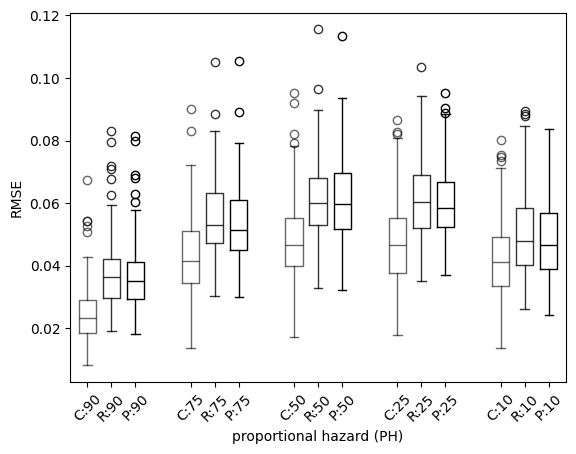

In [159]:
# rmse
cmplx1_rmse_c = get_cmplx_met(artf3, "cmplx1_.+met_c", "rmse")
cmplx1_rmse_r = get_cmplx_met(artf3, "cmplx1_.+met_r", "rmse")
cmplx1_rmse_p = get_cmplx_met(artf3, "cmplx1_.+met_p", "rmse")
 
# remember these are .9 to .10 - L to R
pos = np.array([1,4,7, 10, 13])
lbls = [":90",":75",":50", ":25", ":10"]
mprop = {"color":"black"}

alpha1=0.6
plt.boxplot(cmplx1_rmse_c, positions = pos - .7, 
			medianprops = {"color":"black", "alpha":alpha1},
			boxprops = {"alpha":alpha1},
			whiskerprops={"alpha":alpha1},
			capprops={"alpha":alpha1},
			flierprops={"alpha":alpha1}
			)
alpha2 = 0.8
plt.boxplot(cmplx1_rmse_r, positions = pos,
			medianprops = {"color":"black", "alpha":alpha2},
			boxprops = {"alpha":alpha2},
			whiskerprops={"alpha":alpha2},
			capprops={"alpha":alpha2},
			flierprops={"alpha":alpha2}
			)

plt.boxplot(cmplx1_rmse_p, positions = pos + .7, medianprops=mprop)

# plt.boxplot(cmplx1_rmse_c, positions = pos - .7, medianprops = mprop)
# plt.boxplot(cmplx1_rmse_r, positions = pos, medianprops=mprop)
# plt.boxplot(cmplx1_rmse_p, positions = pos + .7, medianprops=mprop)
plt.xticks(
	np.hstack([pos-.7, pos, pos + .7]) ,
	labels = ["C" + x for x in lbls] + ["R" + x for x in lbls] + ["P" + x for x in lbls],
	rotation = 45
)
plt.ylabel("RMSE")
plt.xlabel("proportional hazard (PH)")
# plt.boxpl

Text(0.5, 0, 'proportional hazard (PH)')

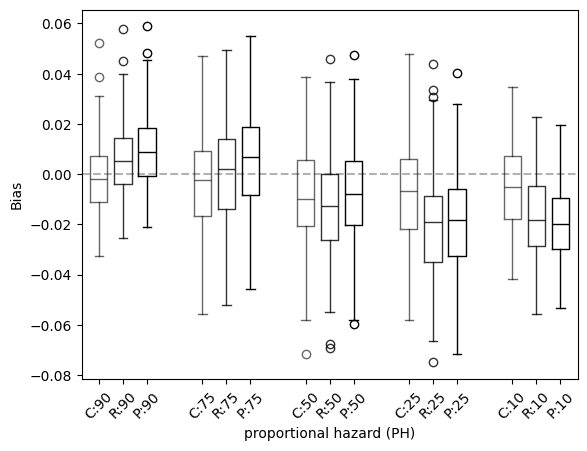

In [158]:
# bias
cmplx1_bias_c = get_cmplx_met(artf3, "cmplx1_.+met_c", "bias")
cmplx1_bias_r = get_cmplx_met(artf3, "cmplx1_.+met_r", "bias")
cmplx1_bias_p = get_cmplx_met(artf3, "cmplx1_.+met_p", "bias")

# remember these are .9 to .10 - L to R
pos = np.array([1,4,7, 10, 13])
lbls = [":90",":75",":50", ":25", ":10"]
mprop = {"color":"black"}

alpha1=0.6
plt.boxplot(cmplx1_bias_c, positions = pos - .7, 
			medianprops = {"color":"black", "alpha":alpha1},
			boxprops = {"alpha":alpha1},
			whiskerprops={"alpha":alpha1},
			capprops={"alpha":alpha1},
			flierprops={"alpha":alpha1}
			)
alpha2 = 0.8
plt.boxplot(cmplx1_bias_r, positions = pos,
			medianprops = {"color":"black", "alpha":alpha2},
			boxprops = {"alpha":alpha2},
			whiskerprops={"alpha":alpha2},
			capprops={"alpha":alpha2},
			flierprops={"alpha":alpha2}
			)

plt.boxplot(cmplx1_bias_p, positions = pos + .7, medianprops=mprop)
plt.xticks(
	np.hstack([pos-.7, pos, pos + .7]) ,
	labels = ["C" + x for x in lbls] + ["R" + x for x in lbls] + ["P" + x for x in lbls],
	rotation = 45
)
plt.axhline(y = 0, linestyle="dashed", color="black", alpha= 0.3)
plt.ylabel("Bias")
plt.xlabel("proportional hazard (PH)")

## non proportional

Text(0.5, 0, 'non-proportional hazard (non-PH)')

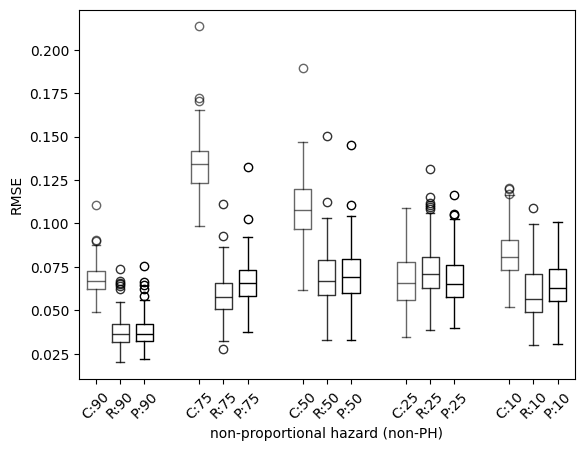

In [155]:
# rmse
cmplx2_rmse_c = get_cmplx_met(artf3, "cmplx2_.+met_c", "rmse")
cmplx2_rmse_r = get_cmplx_met(artf3, "cmplx2_.+met_r", "rmse")
cmplx2_rmse_p = get_cmplx_met(artf3, "cmplx2_.+met_p", "rmse")
 
# remember these are .9 to .10 - L to R
pos = np.array([1,4,7, 10, 13])
lbls = [":90",":75",":50", ":25", ":10"]
mprop = {"color":"black", "alpha":.5}

alpha1 =.6
plt.boxplot(cmplx2_rmse_c, positions = pos - .7, 
			medianprops = {"color":"black", "alpha":alpha1}, 
			boxprops={"alpha":alpha1},
			whiskerprops={"alpha":alpha1},
			capprops={"alpha":alpha1},
			flierprops={"alpha":alpha1}
			)
alpha2 = .8
plt.boxplot(cmplx2_rmse_r, positions = pos, 
			medianprops={"color":"black", "alpha":alpha2}, 
			boxprops = {"alpha":alpha2},
			whiskerprops={"alpha":alpha2},
			capprops={"alpha":alpha2},
			flierprops={"alpha":alpha2}
			)
plt.boxplot(cmplx2_rmse_p, positions = pos + .7, 
			medianprops={"color":"black"})
plt.xticks(
	np.hstack([pos-.7, pos, pos + .7]) ,
	labels = ["C" + x for x in lbls] + ["R" + x for x in lbls] + ["P" + x for x in lbls],
	rotation = 45
)
plt.ylabel("RMSE")
plt.xlabel("non-proportional hazard (non-PH)")

Text(0.5, 0, 'non-proportional hazard (non-PH)')

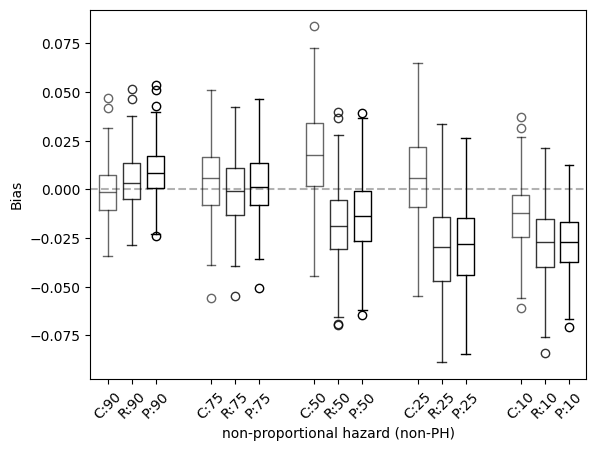

In [160]:
# bias
cmplx2_bias_c = get_cmplx_met(artf3, "cmplx2_.+met_c", "bias")
cmplx2_bias_r = get_cmplx_met(artf3, "cmplx2_.+met_r", "bias")
cmplx2_bias_p = get_cmplx_met(artf3, "cmplx2_.+met_p", "bias")

# remember these are .9 to .10 - L to R
pos = np.array([1,4,7, 10, 13])
lbls = [":90",":75",":50", ":25", ":10"]

alpha1 =.6
plt.boxplot(cmplx2_bias_c, positions = pos - .7, 
			medianprops = {"color":"black", "alpha":alpha1}, 
			boxprops={"alpha":alpha1},
			whiskerprops={"alpha":alpha1},
			capprops={"alpha":alpha1},
			flierprops={"alpha":alpha1}
			)
alpha2 = .8
plt.boxplot(cmplx2_bias_r, positions = pos, 
			medianprops={"color":"black", "alpha":alpha2}, 
			boxprops = {"alpha":alpha2},
			whiskerprops={"alpha":alpha2},
			capprops={"alpha":alpha2},
			flierprops={"alpha":alpha2}
			)
plt.boxplot(cmplx2_bias_p, positions = pos + .7, 
			medianprops={"color":"black"})
plt.xticks(
	np.hstack([pos-.7, pos, pos + .7]) ,
	labels = ["C" + x for x in lbls] + ["R" + x for x in lbls] + ["P" + x for x in lbls],
	rotation = 45
)
plt.axhline(y = 0, linestyle="dashed", color="black", alpha= 0.3)
plt.ylabel("Bias")
plt.xlabel("non-proportional hazard (non-PH)")

# plt.boxplot(cmplx1_bias_c, positions = pos - .7, medianprops = mprop)
# plt.boxplot(cmplx1_bias_r, positions = pos, medianprops=mprop)
# plt.boxplot(cmplx1_bias_p, positions = pos + .7, medianprops=mprop)
# plt.xticks(
# 	np.hstack([pos-.7, pos, pos + .7]) ,
# 	labels = ["C" + x for x in lbls] + ["R" + x for x in lbls] + ["P" + x for x in lbls],
# 	rotation = 45
# )

# plt.ylabel("Bias")
# plt.xlabel("proportional hazard (PH)")

# Complex 3
- data is all in sv_data
- there is one extra dataset but the 3 should be correctly ordered 

In [92]:
def rsqr(true, est):
	SSR = np.sum(np.power(true - est, 2))
	SST = np.sum(np.power(true - np.mean(true), 2))
	return 1-(SSR/SST)

def medabs(true, est):
	mab = np.median(np.abs(true-est))
	return mab

def msqr(true, est):
	msqr = np.sqrt(np.mean(np.power(true-est,2)))
	return msqr

cmpl3_df11 = pd.read_csv('../sv_data/Complex, continuous, 20% cens_400_39600.csv')
cmpl3_df12 = pd.read_csv('../sv_data/Complex, continuous, 20% cens_400_39601.csv')
cmpl3_df13 = pd.read_csv('../sv_data/Complex, continuous, 20% cens_400_39602.csv')

cmpl3_df21 = pd.read_csv('../sv_data/Complex, continuous, 20% cens_1000_99000.csv')
cmpl3_df22 = pd.read_csv('../sv_data/Complex, continuous, 20% cens_1000_99001.csv')
cmpl3_df22 = pd.read_csv('../sv_data/Complex, continuous, 20% cens_1000_99002.csv')


cmpl3_df31 = pd.read_csv('../sv_data/Complex, continuous, 20% cens_4000_396000.csv')
cmpl3_df32 = pd.read_csv('../sv_data/Complex, continuous, 20% cens_4000_396001.csv')
cmpl3_df33 = pd.read_csv('../sv_data/Complex, continuous, 20% cens_4000_396002.csv')


def get_cmpl3(cmpl3_df, rows=400, cols=9):
	trn = cmpl3_df["sv_t"].values.reshape(rows,cols)
	tst = cmpl3_df["sv_tst"].values.reshape(rows, cols)
	brt_trn = cmpl3_df["pb"].values.reshape(rows, cols)
	brt_tst = cmpl3_df["pb_tst"].values.reshape(rows, cols)
	# r_trn = cmpl3_df["r"].values.reshape(400,9)
	return {"trn":trn, "tst":tst, "ptrn":brt_trn, "ptst":brt_tst}

In [108]:
#trn 400
# ot400 = get_cmpl3(cmpl3_df11)

# # get metrics
# rsq = np.round(rsqr(ot400["trn"], ot400["ptrn"]),4)
# msq = np.round(msqr(ot400["trn"], ot400["ptrn"]),4)
# mabs = np.round(medabs(ot400["trn"], ot400["ptrn"]),4)

# plt.plot(ot400["trn"], ot400["ptrn"], "o", color = "black", markersize=.4)
# plt.text(x=-.01, y=0.9, s = f"R-square= {rsq}")
# plt.text(x=-.01, y=0.85, s = f"Median absolute error = {mabs}")
# plt.text(x=-.01, y=0.8, s = f"Mean squared error = {msq}")
# plt.ylabel("p-BART survival probability estimate")
# plt.xlabel("True survival probability")
# plt.title("N=400", fontweight="bold")

In [107]:
# tst 400
# ot400 = get_cmpl3(cmpl3_df11)

# # get metrics
# ktrue = "tst"
# kest = "ptst"
# rsq = np.round(rsqr(ot400[ktrue], ot400[kest]),4)
# msq = np.round(msqr(ot400[ktrue], ot400[kest]),4)
# mabs = np.round(medabs(ot400[ktrue], ot400[kest]),4)

# plt.plot(ot400[ktrue], ot400[kest], "o", color = "black", markersize=.4)
# plt.text(x=-.01, y=0.9, s = f"R-square= {rsq}")
# plt.text(x=-.01, y=0.85, s = f"Median absolute error = {mabs}")
# plt.text(x=-.01, y=0.8, s = f"Mean squared error = {msq}")
# plt.ylabel("p-BART survival probability estimate")
# plt.xlabel("True survival probability")
# plt.title("N=400", fontweight="bold")

Text(0.5, 1.0, 'N=400')

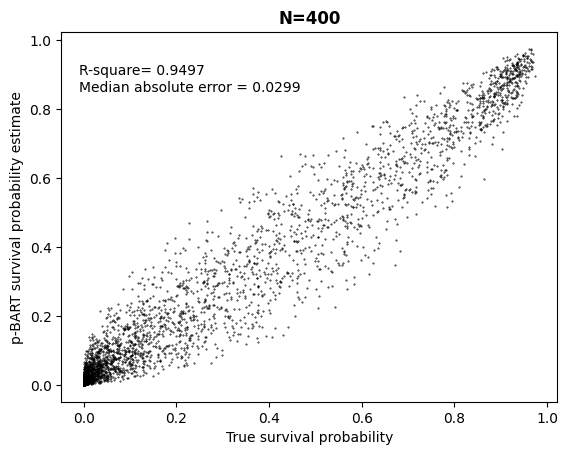

In [95]:
ot400 = get_cmpl3(cmpl3_df12)

# get metrics
ktrue = "tst"
kest = "ptst"
rsq = np.round(rsqr(ot400[ktrue], ot400[kest]),4)
msq = np.round(msqr(ot400[ktrue], ot400[kest]),4)
mabs = np.round(medabs(ot400[ktrue], ot400[kest]),4)

plt.plot(ot400[ktrue], ot400[kest], "o", color = "black", markersize=.4)
plt.text(x=-.01, y=0.9, s = f"R-square= {rsq}")
plt.text(x=-.01, y=0.85, s = f"Median absolute error = {mabs}")
# plt.text(x=-.01, y=0.8, s = f"Mean squared error = {msq}")
plt.ylabel("p-BART survival probability estimate")
plt.xlabel("True survival probability")
plt.title("N=400", fontweight="bold")

Text(0.5, 1.0, 'N=1000')

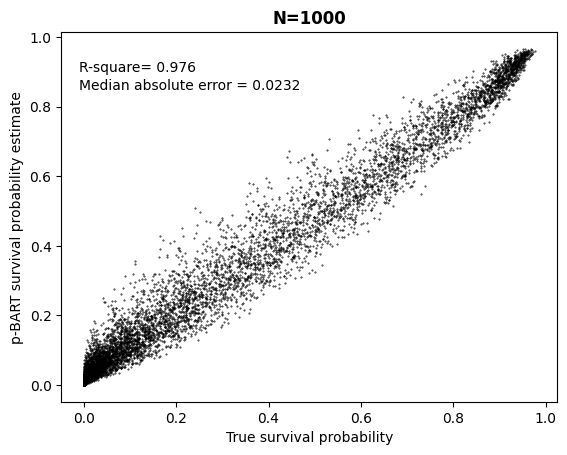

In [105]:
ot400 = get_cmpl3(cmpl3_df21, rows=1000, cols=9)

# get metrics
ktrue = "tst"
kest = "ptst"
rsq = np.round(rsqr(ot400[ktrue], ot400[kest]),4)
msq = np.round(msqr(ot400[ktrue], ot400[kest]),4)
mabs = np.round(medabs(ot400[ktrue], ot400[kest]),4)

plt.plot(ot400[ktrue], ot400[kest], "o", color = "black", markersize=.4)
plt.text(x=-.01, y=0.9, s = f"R-square= {rsq}")
plt.text(x=-.01, y=0.85, s = f"Median absolute error = {mabs}")
# plt.text(x=-.01, y=0.8, s = f"Mean squared error = {msq}")
plt.ylabel("p-BART survival probability estimate")
plt.xlabel("True survival probability")
plt.title("N=1000", fontweight="bold")

Text(0.5, 1.0, 'N=4000')

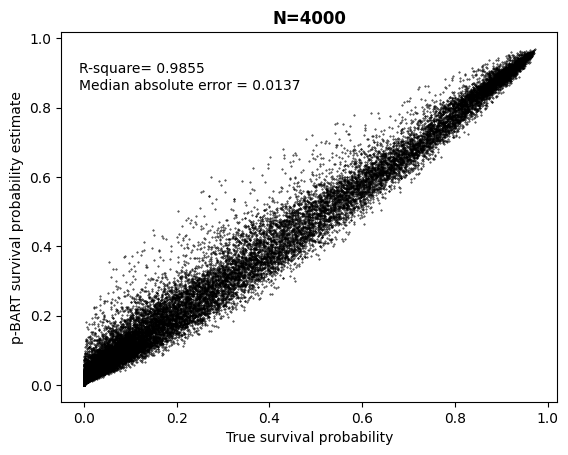

In [104]:
ot400 = get_cmpl3(cmpl3_df33, rows=4000, cols=9)

# get metrics
ktrue = "tst"
kest = "ptst"
rsq = np.round(rsqr(ot400[ktrue], ot400[kest]),4)
msq = np.round(msqr(ot400[ktrue], ot400[kest]),4)
mabs = np.round(medabs(ot400[ktrue], ot400[kest]),4)

plt.plot(ot400[ktrue], ot400[kest], "o", color = "black", markersize=.4)
plt.text(x=-.01, y=0.9, s = f"R-square= {rsq}")
plt.text(x=-.01, y=0.85, s = f"Median absolute error = {mabs}")
# plt.text(x=-.01, y=0.8, s = f"Mean squared error = {msq}")
plt.ylabel("p-BART survival probability estimate")
plt.xlabel("True survival probability")
plt.title("N=4000", fontweight="bold")

In [58]:
# trn = cmpl3_df1["sv_t"].values.reshape(400,9)
# tst = cmpl3_df1["sv_tst"].values.reshape(400,9)
# brt_trn = cmpl3_df1["pb"].values.reshape(400,9)
# brt_tst = cmpl3_df1["pb_tst"].values.reshape(400,9)
# r_trn = cmpl3_df1["r"].values.reshape(400,9)
# plt.plot(brt_trn,trn, "o", color = "black", markersize=.2)

# trn = cmpl3_df2["sv_t"].values.reshape(400,9)
# tst = cmpl3_df2["sv_tst"].values.reshape(400,9)
# brt_trn = cmpl3_df2["pb"].values.reshape(400,9)
# brt_tst = cmpl3_df2["pb_tst"].values.reshape(400,9)
# r_trn = cmpl3_df2["r"].values.reshape(400,9)
# plt.plot(brt_trn,trn, "o", color = "yellow", markersize=.2)

# trn = cmpl3_df3["sv_t"].values.reshape(400,9)
# tst = cmpl3_df3["sv_tst"].values.reshape(400,9)
# brt_trn = cmpl3_df3["pb"].values.reshape(400,9)
# brt_tst = cmpl3_df3["pb_tst"].values.reshape(400,9)
# r_trn = cmpl3_df3["r"].values.reshape(400,9)
# plt.plot(brt_trn,trn, "o", color = "green", markersize=.2)
# plt.plot(r_trn,trn, "o", color = "red", markersize=.2)


In [106]:


print(rsqr(trn, brt_trn))
print(rsqr(tst, brt_tst))
print(msqr(trn, brt_trn))
print(msqr(tst, brt_tst))
print(medabs(trn, brt_trn))
print(medabs(tst, brt_tst))


0.952374429821564
0.9497022664007804
0.06983488233638811
0.07175858661354226
0.029525341382412418
0.029883693649591994


## Get if for the Cox

In [114]:

def get_cmpl3_2(cmpl3_df, col_name = (),  rows=400, cols=9):
	trn = cmpl3_df["sv_t"].values.reshape(rows,cols)
	tst = cmpl3_df["sv_tst"].values.reshape(rows, cols)
	brt_trn = cmpl3_df[col_name[0]].values.reshape(rows, cols)
	brt_tst = cmpl3_df[col_name[1]].values.reshape(rows, cols)
	# r_trn = cmpl3_df["r"].values.reshape(400,9)
	return {"trn":trn, "tst":tst, f"{col_name[0]}trn":brt_trn, f"{col_name[0]}tst":brt_tst}

In [123]:
ot400 = get_cmpl3_2(cmpl3_df33, col_name = ("cph", "cph_tst"), rows=4000, cols=9)

Text(0.5, 1.0, 'N=400')

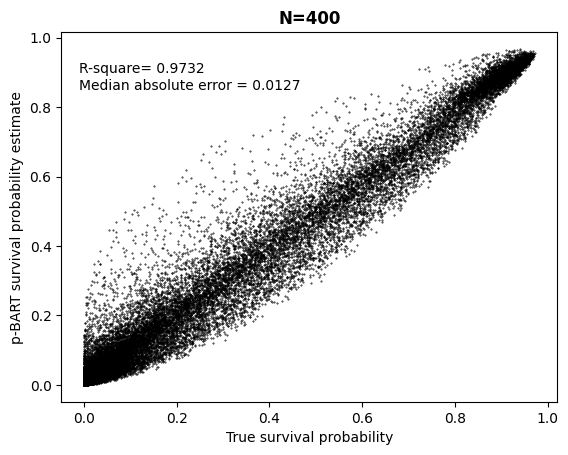

In [124]:
ktrue = "tst"
kest = "cphtst"

rsq = np.round(rsqr(ot400[ktrue], ot400[kest]),4)
msq = np.round(msqr(ot400[ktrue], ot400[kest]),4)
mabs = np.round(medabs(ot400[ktrue], ot400[kest]),4)


plt.plot(ot400[ktrue], ot400[kest], "o", color = "black", markersize=.4)
plt.text(x=-.01, y=0.9, s = f"R-square= {rsq}")
plt.text(x=-.01, y=0.85, s = f"Median absolute error = {mabs}")
# plt.text(x=-.01, y=0.8, s = f"Mean squared error = {msq}")
plt.ylabel("p-BART survival probability estimate")
plt.xlabel("True survival probability")
plt.title("N=400", fontweight="bold")